In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

In [3]:
code_dir = "/home/mlmi-2020/jz522/localisation_from_image_project/code_reg_and_clas"
import os, sys
if code_dir not in sys.path:
    sys.path.append(code_dir)

In [27]:
# load dataset
# data_dir = "/data/cornucopia/jz522/localisation_project/DS_003_JDB-Full/coordinates_256_512_complete_working_141_classes/"
data_dir = "/data/cornucopia/jz522/localisation_project/DS_003_JDB-Full/coordinates_256_512__141_classes__simple_whitening/"
dataset_size = 370
start = 0


images = np.zeros((dataset_size, 256, 512, 3))
oracle_global_coords = np.zeros((dataset_size, 256, 512, 3))
regions = np.zeros((dataset_size, 256, 512, 1))
local_coords = np.zeros((dataset_size, 256, 512, 3))
masks = np.zeros((dataset_size, 256, 512, 1))

for i in tqdm(np.arange(start, start+dataset_size)):
    data = np.load(data_dir + f"{i+1:04}_rendered.png_config.npz")

    
    images[i] = data['image_colors']
    oracle_global_coords[i] = data['points_3d_world']
    regions[i,:,:,0] = data['points_region_class']
    local_coords[i] = data['local_scene_coords']
    masks[i,:,:,0] = data['mask']
    
#     if i == 0:
#         W_inv = data['W_inv']
#         M = data['M']
#         std = data['std']

100%|██████████| 370/370 [00:10<00:00, 35.92it/s]


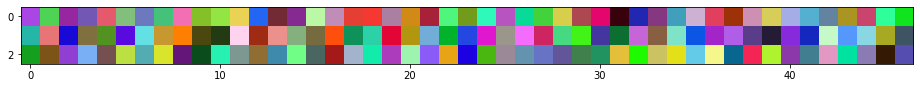

In [28]:
colormap_file_name = "/data/cornucopia/jz522/experiments/model_visualisation/colormap.npy"
colormap = np.load(colormap_file_name)
plt.figure(figsize=(16,6))
plt.imshow(np.reshape(colormap, (3,-1,3)))
plt.show()

# Plot data

In [29]:
def get_color_map(regions, colormap):

    reg_flat = np.reshape(regions, (-1)).astype(int)
    colored_regions_flat = colormap[reg_flat]
    colored_regions = np.reshape(colored_regions_flat, (256,512,3))
    return colored_regions

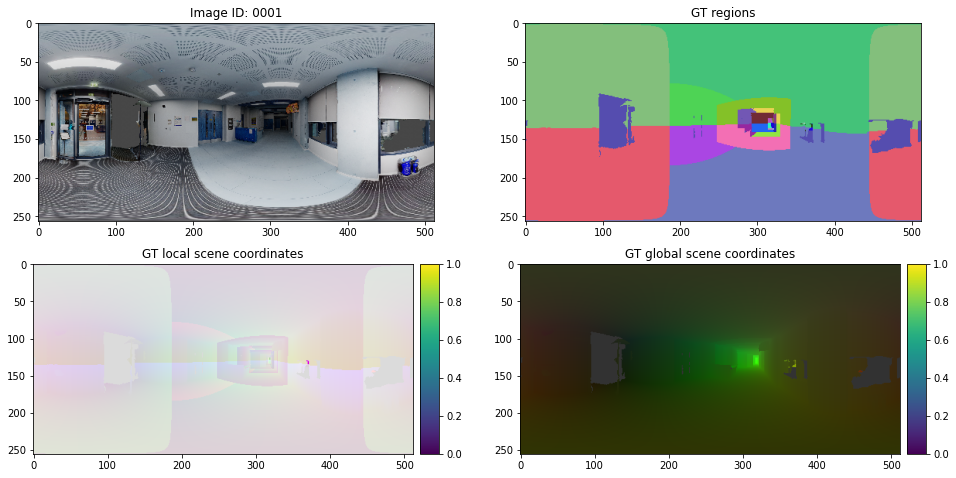

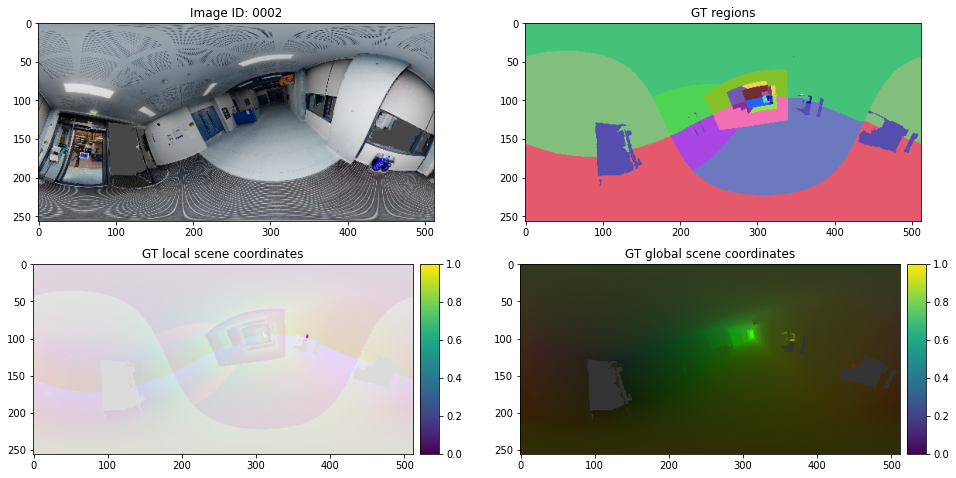

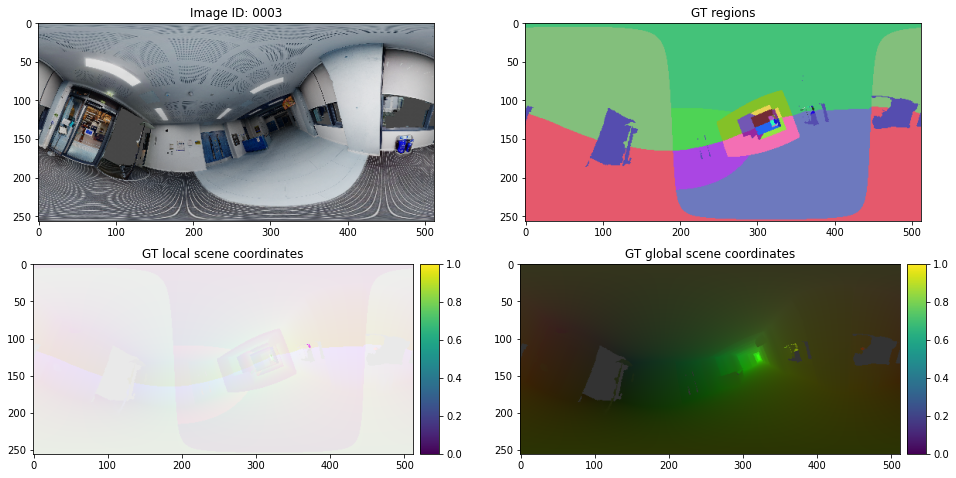

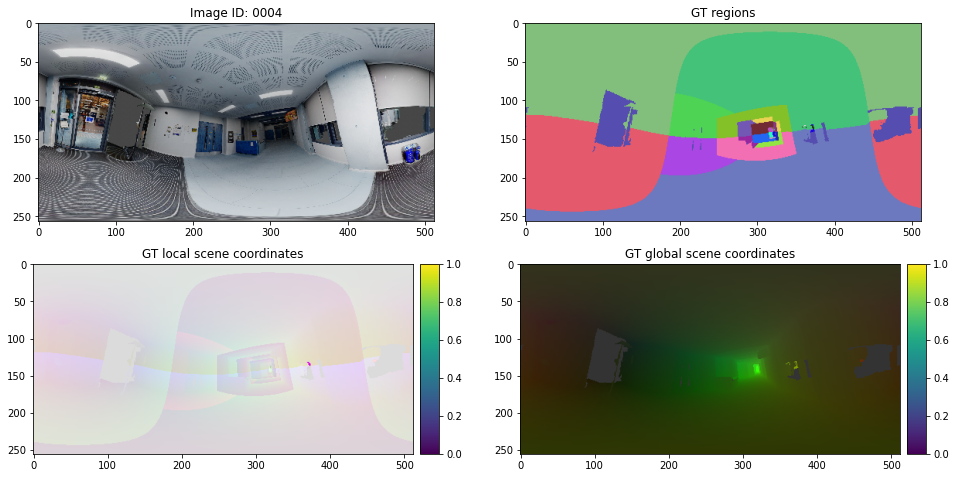

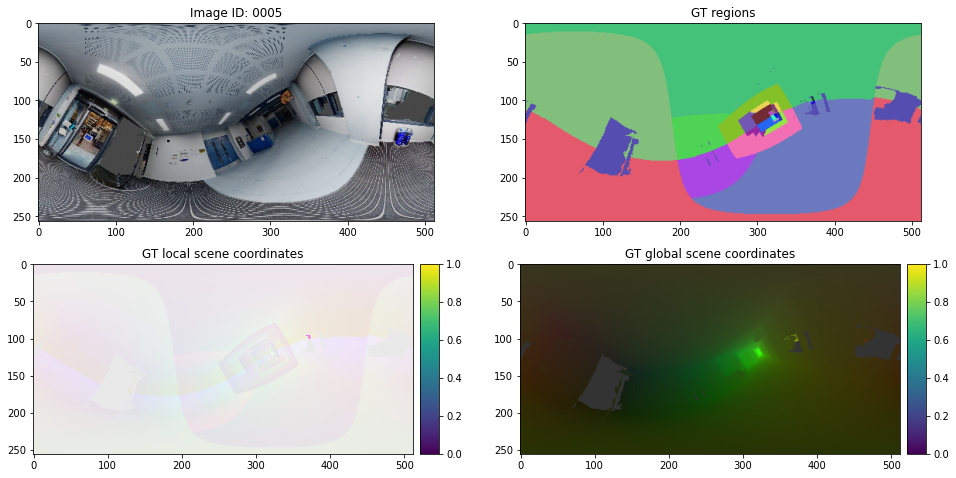

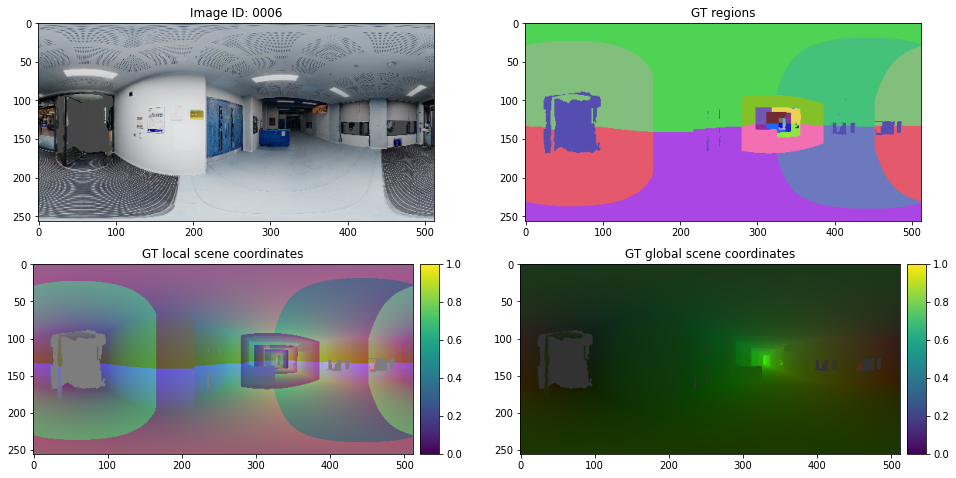

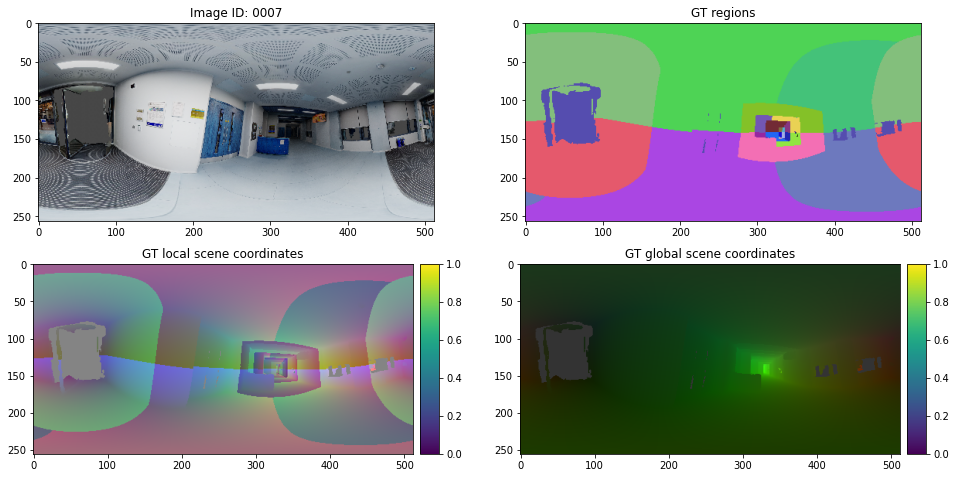

In [ ]:
save_dir = "/data/cornucopia/jz522/experiments/data_visualisation_SW/"
for image_ID in range(10):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,8))

    ax1.imshow(images[image_ID])
    ax1.set_title(f'Image ID: {image_ID+1:04}')

    colored_regions = get_color_map(regions[image_ID], colormap)
    ax2.imshow(colored_regions)
    ax2.set_title('GT regions')

    tmp = (local_coords[image_ID] - local_coords[image_ID].min()) / (local_coords[image_ID].max() - local_coords[image_ID].min())
    im3 = ax3.imshow(tmp)
    ax3.set_title("GT local scene coordinates")
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = fig.colorbar(im3, cax=cax)    


    tmp = (oracle_global_coords[image_ID] - oracle_global_coords[image_ID].min()) / (oracle_global_coords[image_ID].max() - oracle_global_coords[image_ID].min())
    im4 = ax4.imshow(tmp)
    ax4.set_title("GT global scene coordinates")
    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = fig.colorbar(im4, cax=cax)  

    fig.savefig(save_dir + f"{image_ID+1:04}", facecolor='w')
#     plt.close(fig)
    plt.show()

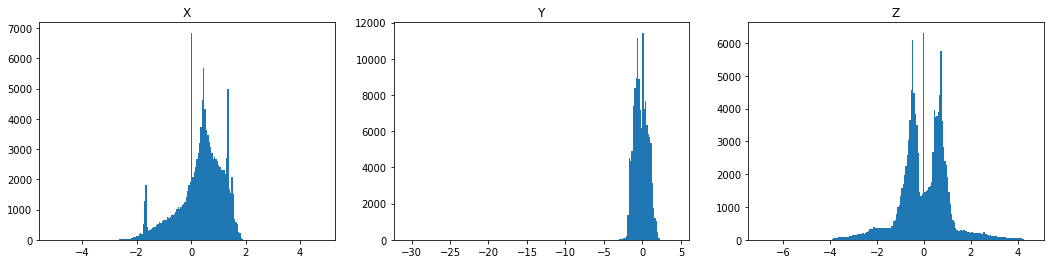

In [23]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(18,4))

ax1.hist(local_coords[image_ID,:,:,0].flatten(), bins=200)
ax1.set_title('X')
ax2.hist(local_coords[image_ID,:,:,1].flatten(), bins=200)
ax2.set_title('Y')
ax3.hist(local_coords[image_ID,:,:,2].flatten(), bins=200)
ax3.set_title('Z')
plt.show()